In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv("communities.csv", na_values = '?')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 129 entries, Unnamed: 0 to  ViolentCrimesPerPop 
dtypes: float64(125), int64(3), object(1)
memory usage: 2.0+ MB


In [232]:
df.columns.get_loc('racepctblack')

8

In [383]:
df.describe()

,Unnamed: 0,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,820.000000,817.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
mean,997.500000,28.683551,58.826829,46188.336597,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,575.762538,16.397553,126.420560,25299.726569,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,...,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718,0.232985
min,1.000000,1.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,499.250000,12.000000,9.000000,25065.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,997.500000,34.000000,23.000000,48090.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,1495.750000,42.000000,59.500000,66660.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,...,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000
max,1994.000000,56.000000,840.000000,94597.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


normality, multicollinearity for regression

In [176]:
#df["county"].value_counts()
df.columns

Index(['Unnamed: 0', 'state', 'county', 'community', 'communityname', 'fold',
       'population', 'householdsize', 'racepctblack', 'racePctWhite',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=129)

Lots of features, need intelligent way to separate/remove from outset, group into multiple dataframes related by features (race, income...), then investigate column data and remove missing value/nonsensical columns, accept from outset that lots of insights will be missed, strive for interesting/unique/applicable ones 

In [4]:
df.columns = df.columns.str.strip() # remove leading and trailing white spaces

Told in docs that county and community have many missing values, remove from all dataframes, will inc certain basic features in all dataframes

In [171]:
df.county.value_counts(normalize = True, dropna = False).iloc[0]
#df.county.head()

0.5887662988966901

In [172]:
df.community.value_counts(normalize = True, dropna = False).iloc[0]

0.5902708124373119

In [5]:
base_cols = ['ViolentCrimesPerPop', 'state',  'population'] # ViolentCrimesPerPop is target variable, 'communityname',
#base_cols = ['ViolentCrimesPerPop', 'state',  'population']

filter_col_race = ['racepctblack', 'racePctWhite','racePctAsian', 'racePctHisp', 'whitePerCap','blackPerCap',
                   'indianPerCap','AsianPerCap','HispPerCap', 'NumImmig', 'PctRecImmig5']
# filter_col_income = ['medIncome','pctWFarmSelf','pctWInvInc', 'pctWSocSec', 'pctWPubAsst','pctWRetire',
#                    'medFamInc','perCapInc', 'PctPopUnderPov']
# filter_col_ed = ['PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed', 'PctEmplManu','PctEmplProfServ',
#                    'PctOccupManu','PctOccupMgmtProf']
# # more sparse data then other datasets as per docs, most per 100k population
# filter_col_pol = ['LemasSwFTPerPop','LemasSwFTFieldPerPop','LemasTotReqPerPop','PolicPerPop', 'RacialMatchCommPol','OfficAssgnDrugUnits',
#                    'NumKindsDrugsSeiz','PolicAveOTWorked', 'PolicBudgPerPop']

filter_col = ['racepctblack', 'racePctWhite', 'NumImmig', 'medIncome','PctPopUnderPov','PctBSorMore','PctUnemployed']

In [6]:
df_agg = df[base_cols + filter_col]
df_agg.head()
# df_agg.dropna() # no missing values as per docs

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,NumImmig,medIncome,PctPopUnderPov,PctBSorMore,PctUnemployed
0,0.20,8,0.19,0.02,0.90,0.03,0.37,0.19,0.48,0.27
1,0.67,53,0.00,0.12,0.74,0.01,0.31,0.24,0.30,0.27
2,0.43,24,0.00,0.49,0.56,0.00,0.30,0.27,0.19,0.36
3,0.12,34,0.04,1.00,0.08,0.02,0.58,0.10,0.31,0.33
4,0.03,42,0.01,0.02,0.95,0.00,0.50,0.06,0.33,0.12


In [43]:
df_agg.describe() ## some things to take from this: high sd for ViolC, better insights shown through graphs 

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,NumImmig,medIncome,PctPopUnderPov,PctBSorMore,PctUnemployed,LogViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.237979,28.683551,0.057593,0.179629,0.753716,0.030060,0.361123,0.303024,0.361675,0.363531,-inf
std,0.232985,16.397553,0.126906,0.253442,0.244039,0.087189,0.209362,0.228474,0.209193,0.202171,NaN
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
25%,0.070000,12.000000,0.010000,0.020000,0.630000,0.000000,0.200000,0.110000,0.210000,0.220000,-2.659260
50%,0.150000,34.000000,0.020000,0.060000,0.850000,0.010000,0.320000,0.250000,0.310000,0.320000,-1.897120
75%,0.330000,42.000000,0.050000,0.230000,0.940000,0.020000,0.490000,0.450000,0.460000,0.480000,-1.108663
max,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [179]:
df_test = df_agg==0.00 # locating zero values in dataset
for col in df_test.columns:
    print(df_test[col].value_counts())

False    1984
True       10
Name: ViolentCrimesPerPop, dtype: int64
False    1994
Name: state, dtype: int64
False    1609
True      385
Name: population, dtype: int64
False    1860
True      134
Name: racepctblack, dtype: int64
False    1961
True       33
Name: racePctWhite, dtype: int64
False    1168
True      826
Name: NumImmig, dtype: int64
False    1993
True        1
Name: medIncome, dtype: int64
False    1991
True        3
Name: PctPopUnderPov, dtype: int64
False    1992
True        2
Name: PctBSorMore, dtype: int64
False    1993
True        1
Name: PctUnemployed, dtype: int64


In [7]:
df_agg_reduce = df_agg.loc[~(df_agg['ViolentCrimesPerPop']==0.00)] # remove 0 values from target variable
df_agg_reduce['LogViolentCrimesPerPop'] = np.log(df_agg_reduce['ViolentCrimesPerPop'])
df_agg_reduce.head()

C:\Users\shane\AppData\Local\Temp/ipykernel_15316/1734349202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_reduce['LogViolentCrimesPerPop'] = np.log(df_agg_reduce['ViolentCrimesPerPop'])


,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,NumImmig,medIncome,PctPopUnderPov,PctBSorMore,PctUnemployed,LogViolentCrimesPerPop
0,0.20,8,0.19,0.02,0.90,0.03,0.37,0.19,0.48,0.27,-1.609438
1,0.67,53,0.00,0.12,0.74,0.01,0.31,0.24,0.30,0.27,-0.400478
2,0.43,24,0.00,0.49,0.56,0.00,0.30,0.27,0.19,0.36,-0.843970
3,0.12,34,0.04,1.00,0.08,0.02,0.58,0.10,0.31,0.33,-2.120264
4,0.03,42,0.01,0.02,0.95,0.00,0.50,0.06,0.33,0.12,-3.506558


C:\Users\shane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


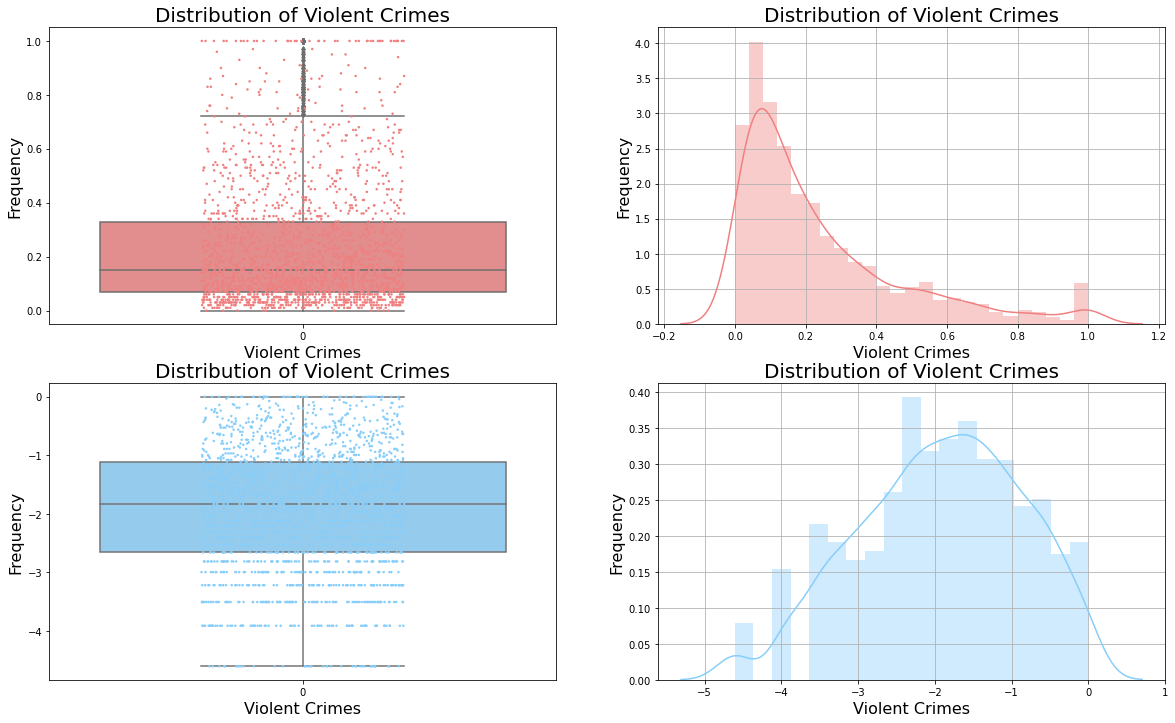

In [181]:
# perhaps analyse/embellish ViolCrime hist more, supplement with 4 other interesting ones
# facets?
fig, axs = plt.subplots(2, 2, figsize = (20,12))
axs[0,0] = sns.boxplot(data = df_agg['ViolentCrimesPerPop'], color="lightcoral", fliersize=3.9, sym='o', ax = axs[0,0])
axs[0,0] = sns.stripplot(data=df_agg['ViolentCrimesPerPop'], color="lightcoral", jitter=0.2, size=2.5, ax = axs[0,0])
#axs[0,0].annotate('Mean: 0.15', (0.1,0.15))
#axs[0,0].plot(np.random.exponential(2)) # could plot exp distribution curve over hist
axs[0,0].set_title('Distribution of Violent Crimes', fontsize = 20)
axs[0,0].set_xlabel('Violent Crimes', fontsize = 16)
axs[0,0].set_ylabel('Frequency', fontsize = 16)

#x = np.linspace(0.1,10)
axs[0,1] = sns.distplot(df_agg['ViolentCrimesPerPop'], hist = True, kde = True, color = 'lightcoral', ax = axs[0,1])
#axs[0,1].annotate("Safe", (0.01,1), color='green', fontsize=12)
axs[0,1].set_title('Distribution of Violent Crimes', fontsize = 20)
axs[0,1].set_xlabel('Violent Crimes', fontsize = 16)
axs[0,1].set_ylabel('Frequency', fontsize = 16)
axs[0,1].grid()

# axs[0,1].hist(df_agg['PctPopUnderPov'], color='blue')
# axs[0,1].set_title('Distribution of Poverty')
# axs[0,1].set_xlabel('Population Percentage Under Poverty')
# axs[0,1].set_ylabel('Frequency')

axs[1,0] = sns.boxplot(data = df_agg_reduce['LogViolentCrimesPerPop'], color="lightskyblue", fliersize=3.9, sym='o', ax = axs[1,0])
axs[1,0] = sns.stripplot(data=df_agg_reduce['LogViolentCrimesPerPop'], color="lightskyblue", jitter=0.2, size=2.5, ax = axs[1,0])
#axs[0,0].plot(np.random.exponential(2)) # could plot exp distribution curve over hist
axs[1,0].set_title('Distribution of Violent Crimes', fontsize = 20)
axs[1,0].set_xlabel('Violent Crimes', fontsize = 16)
axs[1,0].set_ylabel('Frequency', fontsize = 16)

#x = np.linspace(0.1,10)
axs[1,1] = sns.distplot(df_agg_reduce['LogViolentCrimesPerPop'], hist = True, kde = True, color = 'lightskyblue', ax = axs[1,1])
#axs[0,1].annotate("Safe", (0.01,1), color='green', fontsize=12)
axs[1,1].set_title('Distribution of Violent Crimes', fontsize = 20)
axs[1,1].set_xlabel('Violent Crimes', fontsize = 16)
axs[1,1].set_ylabel('Frequency', fontsize = 16)
axs[1,1].grid()
fig.savefig("eda1.pdf")


In [8]:
#df_agg.groupby(by = 'state').agg({'ViolentCrimesPerPop': ['max', 'mean']}).sort_values(by = [('ViolentCrimesPerPop','mean')],ascending = False).head(10)
states = df_agg.groupby(by = 'state').mean()[['ViolentCrimesPerPop']].sort_values(by = 'ViolentCrimesPerPop', ascending = False) # [['ViolentCrimesPerPop']]

In [9]:
# df[df['state']==6]
statestop = states.head(12)
statestop['State'] = ["Washington (1)", "Louisiana (22)", "South Carolina (45)", "Maryland (12)", "Florida (90)",
                   "North Carolina (46)","Alabama (43)","Georgia (37)","Delaware (1)","Kansas (1)","New Mexico (10)",
                   "California (278)"]
# statestop['State'] = ["Washington", "Louisiana", "South Carolina", "Maryland", "Florida",
#                    "North Carolina","Alabama","Georgia", "Delaware"]
#statestop = statestop.iloc[1:,:]
#statestop

C:\Users\shane\AppData\Local\Temp/ipykernel_15316/84928211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statestop['State'] = ["Washington (1)", "Louisiana (22)", "South Carolina (45)", "Maryland (12)", "Florida (90)",


In [10]:
statestop

,ViolentCrimesPerPop,State
state,,
11,1.000000,Washington (1)
22,0.504545,Louisiana (22)
45,0.486786,South Carolina (45)
24,0.480000,Maryland (12)
12,0.458333,Florida (90)
37,0.401957,North Carolina (46)
1,0.393721,Alabama (43)
13,0.384054,Georgia (37)
10,0.370000,Delaware (1)


C:\Users\shane\AppData\Local\Temp/ipykernel_22968/4159844552.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  ax.annotate(words[i], (x[i],y[i]), fontsize=20*states.iloc[i,0]/(i/8) + b, color = col[i], rotation="horizontal")


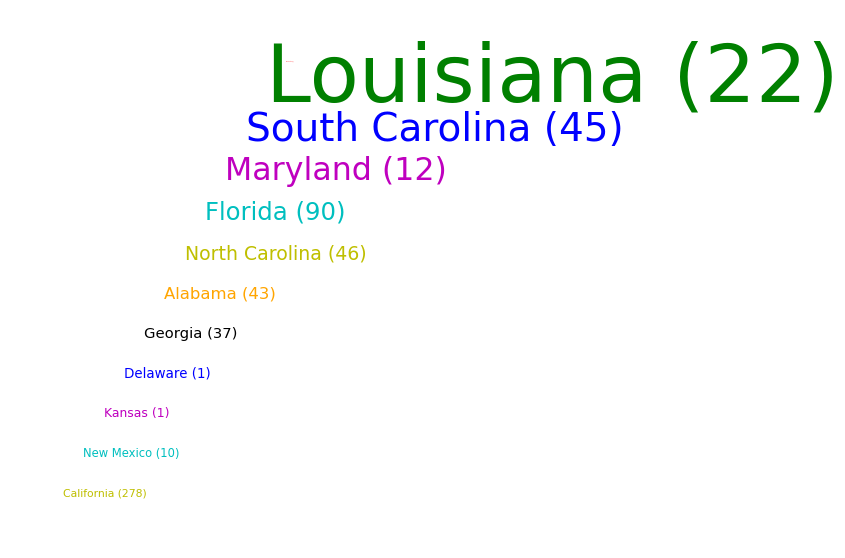

In [184]:
#fig, ax = plt.subplots(figsize = (12,8))
fig = plt.figure(figsize = (10, 10), num = 1, clear = True)
ax = plt.subplot(1, 1, 1, xticks = [], yticks = [], frameon = False)
N = 5
wordcounts = {}
#words = ["Detroit","Cali"]
words = list(statestop['State'])
col =["r", "g", "b", "m", "c","y","orange","black","b", "m", "c","y"]
rotation = ["horizontal","horizontal","horizontal","horizontal","vertical","horizontal","vertical","horizontal",
           "horizontal","vertical","horizontal","horizontal"]
x = np.linspace(0.5, 0.1, 12)
y = np.linspace(0.9, 0.1, 12)
for i in range(12):
    #x = x - np.random.uniform(0,0.05)
    #y = y - np.random.uniform(0,0.15)
#     #freq = wordcounts[words[i]]
#     col =["r", "g", "b", "m", "c"] # [i % 5]
    #print(1000*states.iloc[i,0])
    b = 0
    if i >2:
        b = 6
    ax.annotate(words[i], (x[i],y[i]), fontsize=20*states.iloc[i,0]/(i/8) + b, color = col[i], rotation="horizontal")
plt.show()
#fig.savefig("eda2.pdf")


In [264]:
# list1 = []
# for i in range(8):
#     weight = int(round(1000*statestop.iloc[i,0],0))
#     #print(weight)
#     for j in range(weight):
#         #print(j)
#         list1.append(statestop.iloc[i,1])
# # list1 = ["Det"]*10
# list2 = ", ".join(list1)

# list2

# from wordcloud import WordCloud
# #text = df_agg.description[0]

# # Create and generate a word cloud image:
# wordcloud = WordCloud(background_color="white",prefer_horizontal=0.8).generate(list2)

# # Display the generated image:
# plt.figure(figsize=(12,7))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [185]:
corr_matrix =df_agg.corr()
corr_matrix[(corr_matrix>0.7) | (corr_matrix<-0.7)] 

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,NumImmig,medIncome,PctPopUnderPov,PctBSorMore,PctUnemployed
ViolentCrimesPerPop,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,1.000000,NaN,NaN,0.741593,NaN,NaN,NaN,NaN
racepctblack,NaN,NaN,NaN,1.000000,-0.794389,NaN,NaN,NaN,NaN,NaN
racePctWhite,NaN,NaN,NaN,-0.794389,1.000000,NaN,NaN,NaN,NaN,NaN
NumImmig,NaN,NaN,0.741593,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
medIncome,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.791095,NaN,NaN
PctPopUnderPov,NaN,NaN,NaN,NaN,NaN,NaN,-0.791095,1.000000,NaN,0.776212
PctBSorMore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
PctUnemployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.776212,NaN,1.000000


In [378]:
# fig, ax = plt.subplots(figsize=(12,8))
# sns.heatmap(corr_matrix, annot = True)
# plt.show

C:\Users\shane\AppData\Local\Temp/ipykernel_22968/227170762.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


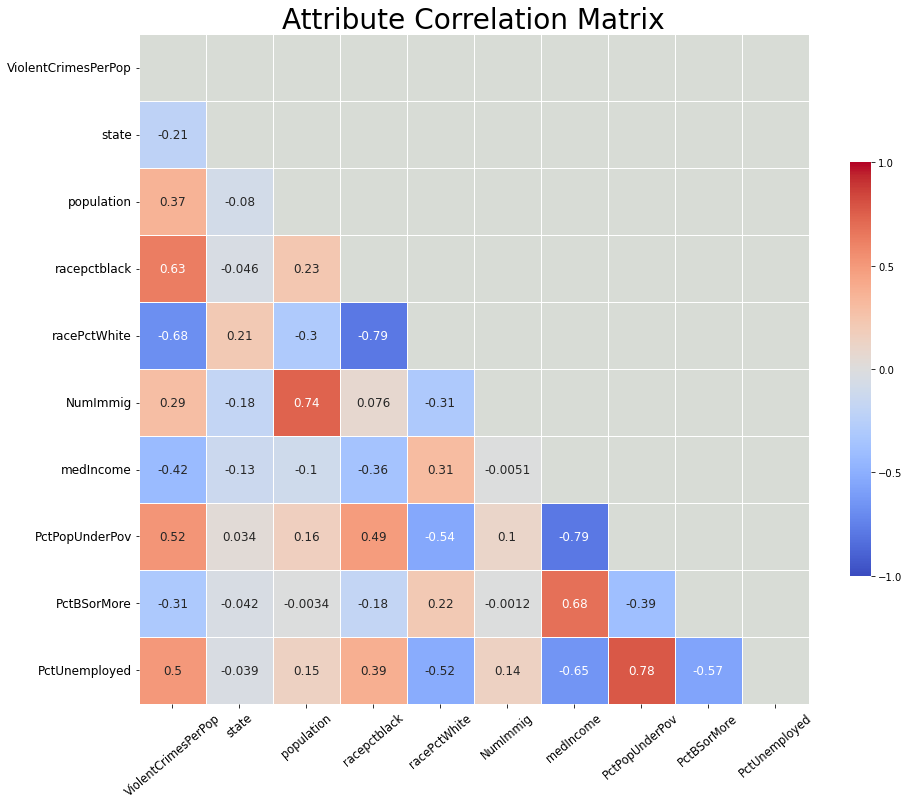

In [186]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(15, 19))
#f.patch.set_facecolor('xkcd:mint green')

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0, fontsize = 12)
ax.set_xticklabels(corr_matrix.columns, rotation = 40, fontsize = 11.5)
ax.set_title("Attribute Correlation Matrix", fontsize = 28)
ax.set_facecolor('xkcd:light grey')

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
f.savefig("eda3.pdf")

First column interesting relating to target variable

In [376]:
# fig, ax = plt.subplots()
# ax.scatter(df_agg['medIncome'], df_agg['PctBSorMore']) # , hue = "USA_origin"

In [187]:
# 29 combinations of variables with correlation > 0.7
(sum(corr_matrix[(corr_matrix>0.7) | (corr_matrix<-0.7)].count())-10)/2

4.0

In [382]:
# 3 combinations of variables with extremely high correlation > 0.9
(sum(corr_matrix[(corr_matrix>0.9) | (corr_matrix<-0.9)].count())-10)/2 

0.0

In [131]:
df_agg['state'].value_counts()

6     278
34    211
48    156
25    120
39    108
42    100
12     90
9      68
55     59
18     48
37     46
36     44
1      43
29     42
53     40
40     36
13     36
47     35
51     33
41     31
45     28
21     26
5      25
44     25
8      25
49     24
22     22
33     21
4      20
28     19
19     19
23     17
54     14
24     12
35     10
46      9
38      8
16      7
27      7
56      7
32      5
50      4
2       3
20      1
11      1
10      1
Name: state, dtype: int64

In [136]:
df[df['state']==39]

,Unnamed: 0,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
27,28,39,29.0,61798.0,Perrytownship,1,0.01,0.37,0.01,0.99,...,0.04,0.09,0.00,NaN,NaN,NaN,NaN,0.0,NaN,0.10
54,55,39,NaN,NaN,Franklincity,1,0.00,0.47,0.02,0.99,...,0.02,0.11,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.10
83,84,39,99.0,63968.0,Polandtownship,1,0.01,0.52,0.00,1.00,...,0.06,0.05,0.00,NaN,NaN,NaN,NaN,0.0,NaN,0.00
122,123,39,61.0,21504.0,Delhitownship,1,0.03,0.68,0.01,0.98,...,0.03,0.25,0.18,NaN,NaN,NaN,NaN,0.0,NaN,0.03
125,126,39,95.0,58730.0,Oregoncity,1,0.01,0.45,0.02,0.96,...,0.08,0.05,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1913,39,NaN,NaN,Wilmingtoncity,10,0.00,0.37,0.11,0.90,...,0.01,0.19,0.03,NaN,NaN,NaN,NaN,0.0,NaN,0.17
1953,1954,39,7.0,18350.0,Conneautcity,10,0.01,0.41,0.02,0.98,...,0.07,0.04,0.04,NaN,NaN,NaN,NaN,0.0,NaN,0.04
1961,1962,39,35.0,16014.0,ClevelandHeightscity,10,0.07,0.40,0.72,0.39,...,0.02,0.56,0.39,NaN,NaN,NaN,NaN,0.0,NaN,0.02
1973,1974,39,NaN,NaN,Englewoodcity,10,0.00,0.38,0.03,0.97,...,0.01,0.18,0.10,NaN,NaN,NaN,NaN,0.0,NaN,0.04


# Race and Ethnicity Analytics

* Multiple Linear Regression

* Random Forest

* Compare

In [188]:
#base_cols = ['ViolentCrimesPerPop',  'population']
df_race = df[base_cols + filter_col_race]
df_race.head()

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumImmig,PctRecImmig5
0,0.20,8,0.19,0.02,0.90,0.12,0.17,0.39,0.32,0.27,0.27,0.41,0.03,0.07
1,0.67,53,0.00,0.12,0.74,0.45,0.07,0.38,0.33,0.16,0.30,0.35,0.01,0.27
2,0.43,24,0.00,0.49,0.56,0.17,0.04,0.29,0.27,0.07,0.29,0.39,0.00,0.02
3,0.12,34,0.04,1.00,0.08,0.12,0.10,0.40,0.39,0.16,0.25,0.44,0.02,0.08
4,0.03,42,0.01,0.02,0.95,0.09,0.05,0.41,0.28,0.00,0.74,0.48,0.00,0.02


In [48]:
df_race.shape

(1994, 14)

In [189]:
df_race['bpct_category'] = pd.cut(df_race['racepctblack'], bins = [0, df_race['racepctblack'].quantile(0.25), 
                                                                 df_race['racepctblack'].quantile(0.5),
                                                                 df_race['racepctblack'].quantile(0.75), 1], 
                                labels = ['low proportion', 'med proportion', 'high proportion', 'very high proportion'])

C:\Users\shane\AppData\Local\Temp/ipykernel_22968/3028698530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['bpct_category'] = pd.cut(df_race['racepctblack'], bins = [0, df_race['racepctblack'].quantile(0.25),


In [190]:
df1 = df_race.groupby(by = 'bpct_category').mean()[['ViolentCrimesPerPop']]

In [191]:
df_race['apct_category'] = pd.cut(df_race['racePctAsian'], bins = [0, df_race['racePctAsian'].quantile(0.25), 
                                                                 df_race['racePctAsian'].quantile(0.5),
                                                                 df_race['racePctAsian'].quantile(0.75), 1], 
                                labels = ['low proportion', 'med proportion', 'high proportion', 'very high proportion'])

C:\Users\shane\AppData\Local\Temp/ipykernel_22968/2199371880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['apct_category'] = pd.cut(df_race['racePctAsian'], bins = [0, df_race['racePctAsian'].quantile(0.25),


In [192]:
df3 = df_race.groupby(by = 'apct_category').mean()[['ViolentCrimesPerPop']]

In [193]:
df_race['wpct_category'] = pd.cut(df_race['racePctWhite'], bins = [0, df_race['racePctWhite'].quantile(0.25), 
                                                                 df_race['racePctWhite'].quantile(0.5),
                                                                 df_race['racePctWhite'].quantile(0.75), 1], 
                                labels = ['low proportion', 'med proportion', 'high proportion', 'very high proportion'])

C:\Users\shane\AppData\Local\Temp/ipykernel_22968/3129827397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['wpct_category'] = pd.cut(df_race['racePctWhite'], bins = [0, df_race['racePctWhite'].quantile(0.25),


In [194]:
df4 = df_race.groupby(by = 'wpct_category').mean()[['ViolentCrimesPerPop']]

In [195]:
df_race['hpct_category'] = pd.cut(df_race['racePctHisp'], bins = [0, df_race['racePctHisp'].quantile(0.25), 
                                                                 df_race['racePctHisp'].quantile(0.5),
                                                                 df_race['racePctHisp'].quantile(0.75), 1], 
                                labels = ['low proportion', 'med proportion', 'high proportion', 'very high proportion'])

C:\Users\shane\AppData\Local\Temp/ipykernel_22968/3075742106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['hpct_category'] = pd.cut(df_race['racePctHisp'], bins = [0, df_race['racePctHisp'].quantile(0.25),


In [196]:
df5 = df_race.groupby(by = 'hpct_category').mean()[['ViolentCrimesPerPop']]

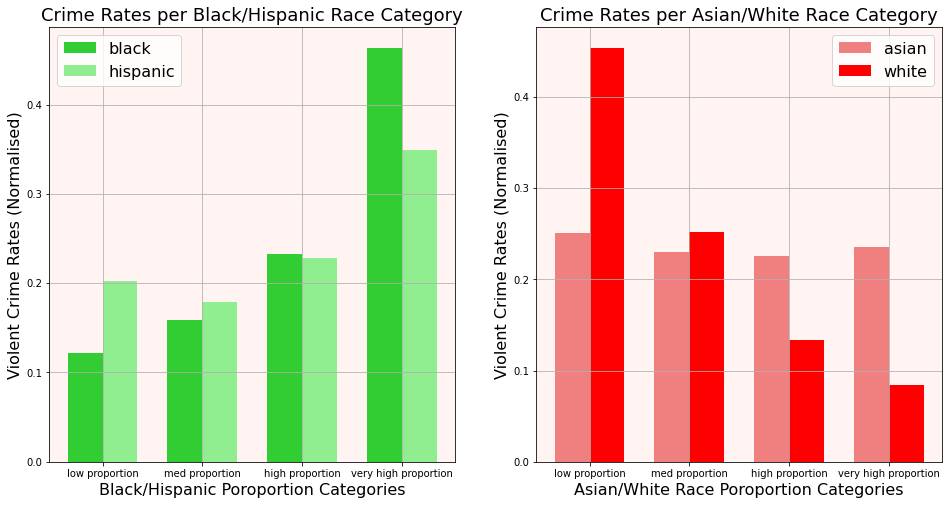

In [197]:
fig, axs = plt.subplots(1,2,figsize=(16,8))#, facecolor='xkcd:light grey')

color=['limegreen','limegreen','limegreen','limegreen']
color1=['lightgreen','lightgreen','lightgreen','lightgreen']
color2=['red','red','red','red']
color3=['lightcoral','lightcoral','lightcoral','lightcoral']
ind = np.arange(len(df1.iloc[:,0]))  # the x locations for the groups
width = 0.35

#fig, ax = plt.subplots(figsize=(12,7))
axs[0].bar(ind-width/2, df1.iloc[:,0], width=width, color = color, label = "black")
#axs[0] = sns.distplot(df1.iloc[:,0], kde = True, color = 'lightskyblue', ax = axs[0])
#axs[0].plot(df1.iloc[:,0])
axs[1].bar(ind-width/2, df3.iloc[:,0], width=width, color = color3, label = "asian")
#axs[1].plot(df3.iloc[:,0])
axs[1].bar(ind+width/2, df4.iloc[:,0], width=width, color = color2, label = "white")
#axs[0].plot(df4.iloc[:,0])
axs[0].bar(ind+width/2, df5.iloc[:,0], width=width, color = color1, label = "hispanic")
#axs[1].plot(df5.iloc[:,0])

axs[0].set_xlabel('Black/Hispanic Poroportion Categories', fontsize = 16)
axs[0].set_ylabel('Violent Crime Rates (Normalised)', fontsize = 16)
axs[0].set_title('Crime Rates per Black/Hispanic Race Category', fontsize = 18)
axs[0].set_xticks(ind)
axs[0].set_xticklabels(df1.index)
axs[0].legend(fontsize = 16)
axs[0].set_facecolor('xkcd:very light pink')
axs[0].grid(zorder=0)

axs[1].set_xlabel('Asian/White Race Poroportion Categories', fontsize = 16)
axs[1].set_ylabel('Violent Crime Rates (Normalised)', fontsize = 16)
axs[1].set_title('Crime Rates per Asian/White Race Category', fontsize = 18)
axs[1].set_xticks(ind)
axs[1].set_xticklabels(df1.index)
axs[1].legend(fontsize = 16)
axs[1].set_facecolor('xkcd:very light pink')
axs[1].grid(zorder=0)
fig.savefig("eda4.pdf")

In [38]:
# ## extremes most important in following two, confounding two previous results so may not be useful
# df_race['bpC_category'] = pd.cut(df_race['blackPerCap'], bins = [0, df_race['blackPerCap'].quantile(0.25), 
#                                                                  df_race['blackPerCap'].quantile(0.5),
#                                                                  df_race['blackPerCap'].quantile(0.75), 1], 
#                                 labels = ['low income', 'med income', 'high income', 'very high income'])

In [34]:
# df_race.groupby(by = ['bpct_category','bpC_category']).mean()[['ViolentCrimesPerPop']]

In [37]:
# df_race['apC_category'] = pd.cut(df_race['AsianPerCap'], bins = [0, df_race['AsianPerCap'].quantile(0.25), 
#                                                                  df_race['AsianPerCap'].quantile(0.5),
#                                                                  df_race['AsianPerCap'].quantile(0.75), 1], 
#                                 labels = ['low income', 'med income', 'high income', 'very high income'])

In [36]:
# df_race.groupby(by = ['apct_category','apC_category']).mean()[['ViolentCrimesPerPop']]

### MLR

#### Ensure no multicollinearity, normally distributed errors, Linearity: The relationship between X and the mean of Y is linear. Homoscedasticity: The variance of residual is the same for any value of X.

In [198]:
# 0 pairs > 0.75
corr_matrix =df_race.corr()
corr_matrix[(df_race.corr()>0.7) | (df_race.corr()<-0.7)]

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumImmig,PctRecImmig5
ViolentCrimesPerPop,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741593,NaN
racepctblack,NaN,NaN,NaN,1.000000,-0.794389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
racePctWhite,NaN,NaN,NaN,-0.794389,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
racePctAsian,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
racePctHisp,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
whitePerCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
blackPerCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
indianPerCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [226]:
from sklearn.model_selection import train_test_split
X = df_race.iloc[:,[2,3,5,6,7,8,9,10,11,13]] # not inc categorical variables or highly corr variables
y = df_race.iloc[:,0]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

In [200]:
y_train.shape

(1595,)

In [253]:
from sklearn.linear_model import LinearRegression 
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)
print(reg.intercept_)
# print(reg.predict(np.array([[3, 5]])))

In [969]:
reg.coef_[3]

-0.05406152290806504

In [974]:
rmse = []
mae = []
blacklist = []
poplist = []
hisplist = []
X = df_race_reduce2.iloc[:,[1,2,3,5,6,7,8,9,10,11,13]] # not inc categorical variables or highly corr variables
y = df_race_reduce2.iloc[:,0]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
    reg = LinearRegression().fit(X_train, y_train)
    rmse.append(np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))
    mae.append(mean_absolute_error(reg.predict(X_test), y_test))
#     blacklist.append(reg.coef_[2])
#     poplist.append(reg.coef_[1])
#     hisplist.append(reg.coef_[5])
#sns.distplot(rmse, hist = True, kde = True, color = 'lightskyblue')

In [254]:
# print(np.std(blacklist))
# print(np.mean(blacklist))
# print(np.std(poplist))
# print(np.mean(poplist))
# print(np.std(hisplist))
# print(np.mean(hisplist))
print(np.std(rmse))
print(np.mean(rmse))
print(np.std(mae))
print(np.mean(mae))

In [15]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.574
Model:                             OLS   Adj. R-squared:                  0.571
Method:                  Least Squares   F-statistic:                     163.9
Date:                 Thu, 24 Mar 2022   Prob (F-statistic):          1.50e-281
Time:                         16:39:29   Log-Likelihood:                 781.37
No. Observations:                 1595   AIC:                            -1535.
Df Residuals:                     1581   BIC:                            -1460.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3016      0.061    

C:\Users\shane\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [255]:
# both scale-dependent
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Root Mean Squared Error %s" % np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))
print("Mean Absolute Error %s" % mean_absolute_error(reg.predict(X_test), y_test))

In [424]:
X = df_race.iloc[:,3] # not inc categorical variables or highly corr variables
y = df_race.iloc[:,0]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

In [431]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [256]:
reg1 = LinearRegression().fit(X_train, y_train)
print(reg1.score(X_train, y_train))
print(reg1.coef_)
print(reg1.intercept_)
print("Root Mean Squared Error %s" % np.sqrt(mean_squared_error(reg1.predict(X_test), y_test)))
print("Mean Absolute Error %s" % mean_absolute_error(reg1.predict(X_test), y_test))

In [77]:
df_race_reduce = df_race.loc[~(df_race['ViolentCrimesPerPop']==0.00)] # remove 0 values from target variable
df_race_reduce['LogViolentCrimesPerPop'] = np.log(df_race_reduce['ViolentCrimesPerPop'])
df_race_reduce.describe()

C:\Users\shane\AppData\Local\Temp/ipykernel_22968/484411475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race_reduce['LogViolentCrimesPerPop'] = np.log(df_race_reduce['ViolentCrimesPerPop'])


,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumImmig,PctRecImmig5,LogViolentCrimesPerPop
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,0.239178,28.667843,0.057843,0.180242,0.752833,0.154103,0.144577,0.367818,0.290696,0.203609,0.322591,0.385897,0.030197,0.182641,-1.924842
std,0.232956,16.407231,0.127176,0.253874,0.244261,0.209273,0.232932,0.186716,0.170808,0.164839,0.195176,0.182638,0.087387,0.236763,1.068678
min,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.605170
25%,0.070000,12.000000,0.010000,0.020000,0.630000,0.040000,0.010000,0.240000,0.170000,0.110000,0.190000,0.260000,0.000000,0.030000,-2.659260
50%,0.160000,34.000000,0.020000,0.060000,0.850000,0.075000,0.040000,0.320000,0.250000,0.170000,0.280000,0.345000,0.010000,0.080000,-1.832581
75%,0.330000,42.000000,0.050000,0.230000,0.940000,0.170000,0.160000,0.440000,0.380000,0.250000,0.400000,0.480000,0.020000,0.230000,-1.108663
max,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


### Transformation 1: Log 1

In [809]:
X = df_race_reduce.iloc[:,[1,2,3,5,6,7,8,9,10,11,13]] # not inc categorical variables or highly corr variables
y = df_race_reduce.iloc[:,15]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

In [257]:
regt1 = LinearRegression().fit(X_train, y_train)
print(regt1.score(X_train, y_train))
print(regt1.coef_)
print(regt1.intercept_)
print("Root Mean Squared Error %s" % np.sqrt(mean_squared_error(regt1.predict(X_test), y_test)))
print("Mean Absolute Error %s" % mean_absolute_error(regt1.predict(X_test), y_test))

### Transformation 2: Log all

In [813]:
# df_test = df_race_reduce1==0.00 # locating zero values in dataset
# for col in df_test.columns:
#     print(df_test[col].value_counts())

In [816]:
df_race_reduce1 = df_race_reduce
df_race_reduce1 = df_race_reduce1.replace(0,0.01)

In [817]:
df_race_reduce1 = np.log(df_race_reduce1)
df_race_reduce1.describe()

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumImmig,PctRecImmig5,LogVC,LogViolentCrimesPerPop
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,4.400000e+01,4.400000e+01
mean,-1.924842,3.071054,-3.624134,-2.696286,-0.417603,-2.518039,-2.952565,-1.119834,-1.433323,-1.954270,-1.343223,-1.063103,-4.077441,-2.475581,-4.605170e+00,-4.605170e+00
std,1.068678,0.899087,1.091227,1.470073,0.732842,1.122948,1.413128,0.503995,0.733505,1.020980,0.757174,0.497875,0.904204,1.310421,2.695340e-15,2.695340e-15
min,-4.605170,0.000000,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170e+00,-4.605170e+00
25%,-2.659260,2.484907,-4.605170,-3.912023,-0.462035,-3.218876,-4.605170,-1.427116,-1.771957,-2.207275,-1.660731,-1.347074,-4.605170,-3.506558,-4.605170e+00,-4.605170e+00
50%,-1.832581,3.526361,-3.912023,-2.813411,-0.162519,-2.592494,-3.218876,-1.139434,-1.386294,-1.771957,-1.272966,-1.064316,-4.605170,-2.525729,-4.605170e+00,-4.605170e+00
75%,-1.108663,3.737670,-2.995732,-1.469676,-0.061875,-1.771957,-1.832581,-0.820981,-0.967584,-1.386294,-0.916291,-0.733969,-3.912023,-1.469676,-4.605170e+00,-4.605170e+00
max,0.000000,4.025352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.605170e+00,-4.605170e+00


In [896]:
X = df_race.iloc[:,[1,2,3,5,6,7,8,9,10,11,13]] # not inc categorical variables or highly corr variables
y = df_race.iloc[:,0]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

In [258]:
regt2 = LinearRegression().fit(X_train, y_train)
print(regt2.score(X_train, y_train))
print(regt2.coef_)
print(regt2.intercept_)
print("Root Mean Squared Error %s" % np.sqrt(mean_squared_error(regt2.predict(X_test), y_test)))
print("Mean Absolute Error %s" % mean_absolute_error(regt2.predict(X_test), y_test))

### Transform predictors 1

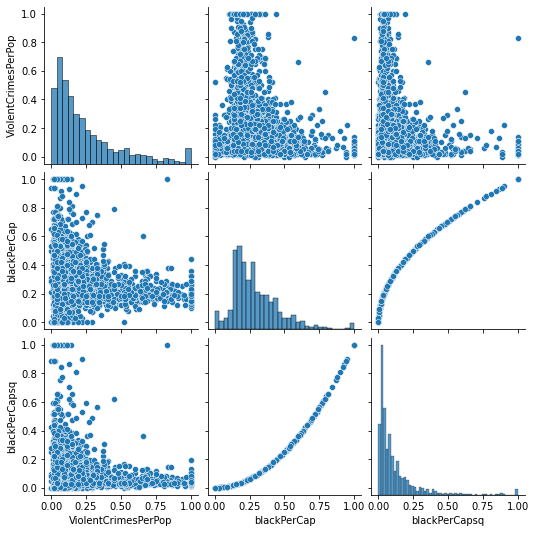

In [833]:
sns.pairplot(df_race.iloc[:,[0,8,15]])

In [832]:
df_racet = df_race
df_racet['blackPerCapsq'] = df_race['blackPerCap']**2
df_racet.head()

C:\Users\shane\AppData\Local\Temp/ipykernel_3652/1735093267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_racet['blackPerCapsq'] = df_race['blackPerCap']**2


,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumImmig,PctRecImmig5,LogVC,blackPerCapsq
0,0.20,8,0.19,0.02,0.90,0.12,0.17,0.39,0.32,0.27,0.27,0.41,0.03,0.07,-1.609438,0.1024
1,0.67,53,0.00,0.12,0.74,0.45,0.07,0.38,0.33,0.16,0.30,0.35,0.01,0.27,-0.400478,0.1089
2,0.43,24,0.00,0.49,0.56,0.17,0.04,0.29,0.27,0.07,0.29,0.39,0.00,0.02,-0.843970,0.0729
3,0.12,34,0.04,1.00,0.08,0.12,0.10,0.40,0.39,0.16,0.25,0.44,0.02,0.08,-2.120264,0.1521
4,0.03,42,0.01,0.02,0.95,0.09,0.05,0.41,0.28,0.00,0.74,0.48,0.00,0.02,-3.506558,0.0784


In [842]:
X = df_racet.iloc[:,[1,2,3,5,6,8,9,10,11,13,15]] # not inc categorical variables or highly corr variables
y = df_racet.iloc[:,0]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

In [843]:
regt3 = LinearRegression().fit(X_train, y_train)
print(regt3.score(X_train, y_train))
print(regt3.coef_)
print(regt3.intercept_)
print("Root Mean Squared Error %s" % np.sqrt(mean_squared_error(regt3.predict(X_test), y_test)))
print("Mean Absolute Error %s" % mean_absolute_error(regt3.predict(X_test), y_test))

0.5769342840610103
[-0.0016555   0.34302596  0.51727832 -0.05125674  0.22755779 -0.28125524
 -0.04420445 -0.02123511 -0.02100566  0.09122898  0.18196943]
0.2150709469499717
Root Mean Squared Error 0.156768493141189
Mean Absolute Error 0.10902186046980568


### Reorder

In [844]:
df_race.head()

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumImmig,PctRecImmig5,LogVC,blackPerCapsq
0,0.20,8,0.19,0.02,0.90,0.12,0.17,0.39,0.32,0.27,0.27,0.41,0.03,0.07,-1.609438,0.1024
1,0.67,53,0.00,0.12,0.74,0.45,0.07,0.38,0.33,0.16,0.30,0.35,0.01,0.27,-0.400478,0.1089
2,0.43,24,0.00,0.49,0.56,0.17,0.04,0.29,0.27,0.07,0.29,0.39,0.00,0.02,-0.843970,0.0729
3,0.12,34,0.04,1.00,0.08,0.12,0.10,0.40,0.39,0.16,0.25,0.44,0.02,0.08,-2.120264,0.1521
4,0.03,42,0.01,0.02,0.95,0.09,0.05,0.41,0.28,0.00,0.74,0.48,0.00,0.02,-3.506558,0.0784


In [853]:
X = df_race.iloc[:,[3,7,6,5,8,9,10,11,13,1,2]] # not inc categorical variables or highly corr variables
y = df_race.iloc[:,0]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

In [855]:
regt4 = LinearRegression().fit(X_train, y_train)
print(regt4.score(X_train, y_train))
print(regt4.coef_)
print(regt4.intercept_)
print("Root Mean Squared Error %s" % np.sqrt(mean_squared_error(regt4.predict(X_test), y_test)))
print("Mean Absolute Error %s" % mean_absolute_error(regt4.predict(X_test), y_test))

0.5841068652490908
[ 5.28061791e-01 -1.46224077e-01  1.61988719e-01 -4.66386880e-02
 -9.08437778e-02 -4.29960999e-02  1.71387988e-02  1.64533605e-04
  1.44599283e-01 -2.03730382e-03  3.16356134e-01]
0.22476214556162108
Root Mean Squared Error 0.15436878682623725
Mean Absolute Error 0.10999543646074893


### Remove 'extreme values'

In [866]:
df_race.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumImmig,PctRecImmig5
0,0.20,8,0.19,0.02,0.90,0.12,0.17,0.39,0.32,0.27,0.27,0.41,0.03,0.07
1,0.67,53,0.00,0.12,0.74,0.45,0.07,0.38,0.33,0.16,0.30,0.35,0.01,0.27
2,0.43,24,0.00,0.49,0.56,0.17,0.04,0.29,0.27,0.07,0.29,0.39,0.00,0.02
3,0.12,34,0.04,1.00,0.08,0.12,0.10,0.40,0.39,0.16,0.25,0.44,0.02,0.08
4,0.03,42,0.01,0.02,0.95,0.09,0.05,0.41,0.28,0.00,0.74,0.48,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.09,12,0.01,0.10,0.87,0.12,0.16,0.50,0.27,0.00,0.16,0.52,0.01,0.19
1990,0.45,6,0.05,0.46,0.28,0.83,0.32,0.20,0.26,0.18,0.20,0.26,0.05,0.68
1991,0.23,9,0.16,0.25,0.69,0.04,0.25,0.34,0.25,0.19,0.28,0.28,0.06,0.09
1992,0.19,25,0.08,0.06,0.87,0.22,0.10,0.40,0.29,0.20,0.31,0.37,0.06,0.43


In [940]:
df_race_reduce2 = df_race.loc[(df_race != 0).all(axis=1)]
#df_race_reduce2 = df_race_reduce2.loc[(df_race_reduce2 != 1).all(axis=1)]
df_race_reduce2.describe()

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumImmig,PctRecImmig5,LogVC,blackPerCapsq
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,0.255983,25.045216,0.096646,0.166004,0.719043,0.235447,0.207729,0.412713,0.321556,0.237108,0.329422,0.397729,0.053333,0.277245,-1.755662,0.127632
std,0.210326,17.045050,0.156798,0.214747,0.220004,0.247297,0.252325,0.194336,0.155755,0.154898,0.157789,0.165096,0.108538,0.261037,0.974730,0.140194
min,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.050000,0.010000,0.010000,0.060000,0.080000,0.010000,0.010000,-4.605170,0.000100
25%,0.090000,6.000000,0.020000,0.030000,0.590000,0.070000,0.040000,0.280000,0.210000,0.150000,0.220000,0.280000,0.010000,0.080000,-2.407946,0.044100
50%,0.190000,25.000000,0.050000,0.070000,0.780000,0.140000,0.100000,0.370000,0.290000,0.200000,0.290000,0.360000,0.020000,0.170000,-1.660731,0.084100
75%,0.360000,39.000000,0.100000,0.220000,0.900000,0.300000,0.270000,0.500000,0.400000,0.270000,0.390000,0.480000,0.050000,0.380000,-1.021651,0.160000
max,0.950000,56.000000,1.000000,1.000000,0.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.051293,1.000000


In [945]:
X = df_race_reduce2.iloc[:,[1,2,3,5,6,7,8,9,10,11,13]] # not inc categorical variables or highly corr variables
y = df_race_reduce2.iloc[:,0]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

In [259]:
regt5 = LinearRegression().fit(X_train, y_train)
print(regt5.score(X_train, y_train))
print(regt5.coef_)
print(regt5.intercept_)
print("Root Mean Squared Error %s" % np.sqrt(mean_squared_error(regt5.predict(X_test), y_test)))
print("Mean Absolute Error %s" % mean_absolute_error(regt5.predict(X_test), y_test))

In [165]:
df_race_reduce3 = df_race[df_race['state']==25]

df_race_reduce3.head()

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumImmig,PctRecImmig5
12,0.06,25,0.03,0.01,0.96,0.13,0.02,0.77,0.62,0.14,0.54,0.46,0.01,0.13
75,0.18,25,0.02,0.02,0.97,0.02,0.02,0.33,0.11,0.17,0.16,0.26,0.01,0.10
95,0.37,25,0.07,0.08,0.84,0.32,0.05,0.36,0.36,0.18,0.26,0.45,0.05,0.42
112,0.06,25,0.02,0.03,0.96,0.06,0.01,0.46,0.42,0.54,0.37,0.52,0.01,0.06
131,0.15,25,0.00,0.01,0.98,0.06,0.01,0.34,0.62,0.24,0.16,0.46,0.00,0.08


In [166]:
X = df_race_reduce3.iloc[:,[1,2,3,5,6,7,8,9,10,11,13]] # not inc categorical variables or highly corr variables
y = df_race_reduce3.iloc[:,0]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

In [260]:
regt6 = LinearRegression().fit(X_train, y_train)
print(regt6.score(X_train, y_train))
print(regt6.coef_)
print(regt6.intercept_)
print("Root Mean Squared Error %s" % np.sqrt(mean_squared_error(regt6.predict(X_test), y_test)))
print("Mean Absolute Error %s" % mean_absolute_error(regt6.predict(X_test), y_test))

### Random Forest

#### Assumptions:

In [203]:
def train_pred_rmse(model, train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    return np.sqrt(mean_squared_error(pred_y, test_y))
def train_pred_mae(model, train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    return mean_absolute_error(pred_y, test_y)

In [261]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
print("Root Mean Squared Error %s" % train_pred_rmse(model1,X_train, y_train, X_test, y_test))
print("Mean Absolute Error %s" % train_pred_mae(model1,X_train, y_train, X_test, y_test))

In [262]:
rmse = []
mae = []
# X = df_race_reduce2.iloc[:,[1,2,3,5,6,7,8,9,10,11,13]] # not inc categorical variables or highly corr variables
# y = df_race_reduce2.iloc[:,0]
X = df_race.iloc[:,[1,2,3,5,6,7,8,9,10,11,13]] # not inc categorical variables or highly corr variables
y = df_race.iloc[:,0]
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)
    model1 = RandomForestRegressor()
    #reg = LinearRegression().fit(X_train, y_train)
    rmse.append(train_pred_rmse(model1,X_train, y_train, X_test, y_test))
    mae.append(train_pred_mae(model1,X_train, y_train, X_test, y_test))
#sns.distplot(rmse, hist = True, kde = True, color = 'lightskyblue')

In [263]:
print(np.std(rmse))
print(np.mean(rmse))
print(np.std(mae))
print(np.mean(mae))

In [205]:
race_columns = ['ViolentCrimesPerPop', 'population', 'racepctblack',
                'racePctAsian', 'racePctHisp', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'HispPerCap', 
       'PctRecImmig5']

In [463]:
df2.index

Index(['state', 'population', 'racepctblack', 'racePctAsian', 'racePctHisp',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'HispPerCap', 'PctRecImmig5'],
      dtype='object', name='variable')

In [230]:
forest_importances

population      0.057817
racepctblack    0.552425
racePctAsian    0.012171
racePctHisp     0.122170
whitePerCap     0.023425
blackPerCap     0.075021
indianPerCap    0.000727
AsianPerCap     0.013854
HispPerCap      0.007935
PctRecImmig5    0.019213
dtype: float64

Elapsed time to compute the importances: 2.129 seconds


C:\Users\shane\AppData\Local\Temp/ipykernel_22968/2471970942.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df2.index,rotation=45, fontsize = 14)


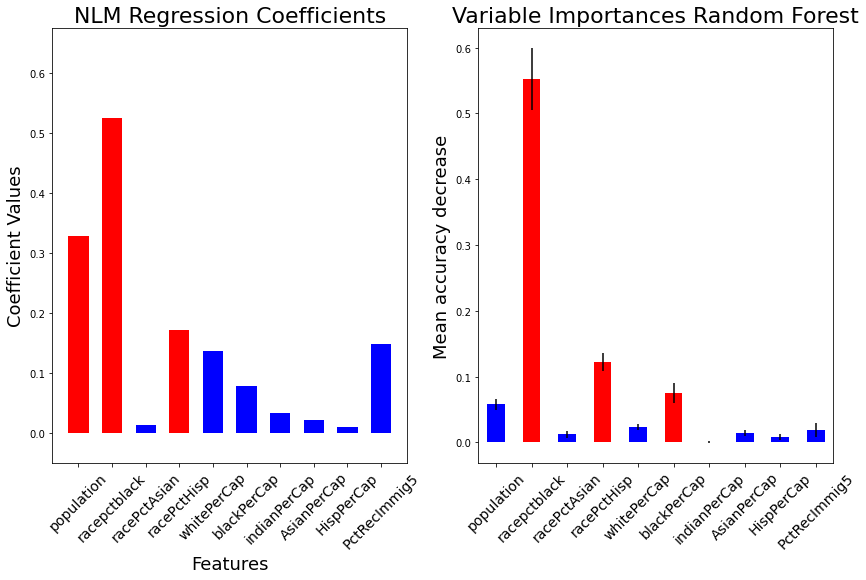

In [236]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    model1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=race_columns[1:]) # , index=feature_names
fig, axs = plt.subplots(1,2, figsize=(14,8))

df2 = pd.DataFrame.from_dict({
    'variable': race_columns[1:],
    'Coefficient Value': abs(reg.coef_)
})
df2 = df2.set_index('variable')
#df2 = df2.sort_index()
color=['red', 'red', 'blue', 'red','blue','blue','blue','blue','blue','blue']
color1=['blue', 'red', 'blue', 'red','blue','red','blue','blue','blue','blue']

#fig, ax = plt.subplots(figsize=(12,7))
#df2.plot.bar(figsize=(14,8), color=['black', 'red', 'green', 'blue', 'cyan','black', 'red', 'green', 'blue', 'cyan','black'], ax = axs[0])
axs[0].bar(df2.index, df2.iloc[:,0], width=0.6,color=color)
axs[0].set_xlabel('Features', fontsize = 18)
axs[0].set_ylabel('Coefficient Values', fontsize = 18)
axs[0].set_title('NLM Regression Coefficients', fontsize = 22)
axs[0].set_xticklabels(df2.index,rotation=45, fontsize = 14)
axs[0].set_ylim(-0.05,0.675)
#axs[0].set_facecolor('xkcd:pale blue')
#axs[0].grid(zorder=0)
#plt.savefig('vi2.pdf')

axs[1].set_title("Variable Importances Random Forest", fontsize = 22)
forest_importances.plot.bar(yerr=result.importances_std, color=color1,ax=axs[1])
axs[1].set_ylabel("Mean accuracy decrease", fontsize = 18)
axs[1].set_xticklabels(df2.index,rotation=45, fontsize = 14)
#axs[1].set_facecolor('xkcd:pale blue')
#axs[1].grid(zorder=0)
#axs[1].legend("Mean accuracy decrease")
#fig.tight_layout()
fig.savefig('model1.pdf')

# Other Explanatory Variables

* Lasso regression, deals with multicollinearity

* K-means clustering features

* (MLP network)

* Compare

In [23]:
# !conda install -c conda-forge folium=0.5.0 --yes
# import folium
# latitude = 47.6
# longitude = -122.3
# seattle_map = folium.Map(location=[latitude, longitude], zoom_start=11)
# seattle_map

## Lasso Regression Model

In [238]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import time
from sklearn.pipeline import make_pipeline

In [210]:
df_agg.head()

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,NumImmig,medIncome,PctPopUnderPov,PctBSorMore,PctUnemployed
0,0.20,8,0.19,0.02,0.90,0.03,0.37,0.19,0.48,0.27
1,0.67,53,0.00,0.12,0.74,0.01,0.31,0.24,0.30,0.27
2,0.43,24,0.00,0.49,0.56,0.00,0.30,0.27,0.19,0.36
3,0.12,34,0.04,1.00,0.08,0.02,0.58,0.10,0.31,0.33
4,0.03,42,0.01,0.02,0.95,0.00,0.50,0.06,0.33,0.12


In [248]:
X = df_agg.iloc[:,[4,5,6,7,8,9]] # not inc categorical variables or highly corr variables
y = df_agg.iloc[:,0]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

In [240]:
# transformations
df_agg_reduce1 = df_agg.loc[(df_agg != 0).all(axis=1)]
df_agg_reduce1.describe()

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,NumImmig,medIncome,PctPopUnderPov,PctBSorMore,PctUnemployed
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,0.264581,25.016749,0.096768,0.170384,0.718837,0.053704,0.408365,0.278355,0.407734,0.350079
std,0.235036,16.776190,0.160681,0.222540,0.225451,0.113645,0.213802,0.209222,0.220762,0.182575
min,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.020000,0.010000,0.030000,0.030000
25%,0.090000,6.000000,0.020000,0.020000,0.590000,0.010000,0.230000,0.100000,0.240000,0.220000
50%,0.190000,25.000000,0.040000,0.070000,0.780000,0.020000,0.360000,0.210000,0.350000,0.320000
75%,0.365000,39.000000,0.095000,0.220000,0.900000,0.050000,0.540000,0.420000,0.530000,0.450000
max,1.000000,56.000000,1.000000,1.000000,0.990000,1.000000,1.000000,1.000000,1.000000,1.000000


In [241]:
X = df_agg_reduce1.iloc[:,[1,4,5,6,7,8,9]] # not inc categorical variables or highly corr variables
y = df_agg_reduce1.iloc[:,0]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

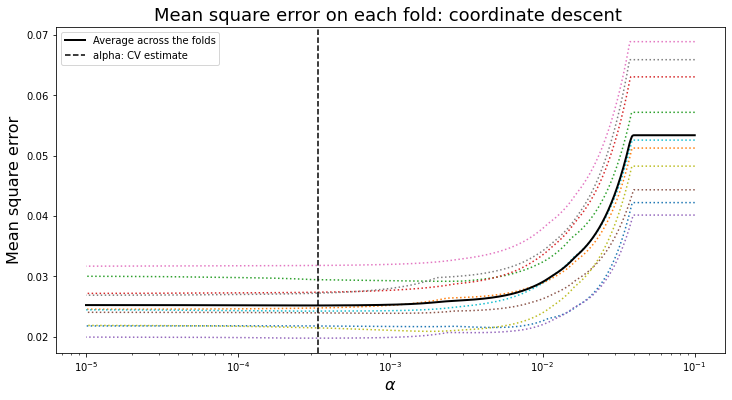

In [249]:
# train lasso model
alphas = np.logspace(-5,-1,1000)
start_time = time.time()
## k = 10 chosen as not too comp exp w small dataset, not too high for overfitting
model = make_pipeline(LassoCV(cv=10, alphas=alphas)).fit(X_train, y_train) # scaled separately, StandardScaler(), 
fit_time = time.time() - start_time

#ymin, ymax = 2300, 3800
lasso = model[-1]
fig, ax = plt.subplots(figsize = (12,6))
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

#plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$", fontsize = 16)
plt.ylabel("Mean square error", fontsize = 16)
plt.legend()
_ = plt.title(
    "Mean square error on each fold: coordinate descent ", fontsize = 18) # (train time: {fit_time:.2f}s)

In [620]:
model[-1].alpha_

1e-05

In [264]:
# scaler = StandardScaler()

# X_train_ = scaler.fit_transform(X_train)
# X_test_ = scaler.fit_transform(X_test)
tuned_lasso = LassoCV(cv=10, alphas=alphas).fit(X_train, y_train)
rmse_lasso = np.sqrt(mean_squared_error(tuned_lasso.predict(X_test), y_test))
#mse_lasso # slightly worse than RF
mae_lasso = mean_absolute_error(tuned_lasso.predict(X_test), y_test)
#mae_lasso 

print(f'Tuned model LASSO MSE: {tuned_lasso.coef_}')
print(f'Tuned model LASSO MSE: {round(rmse_lasso, 8)}')
print(f'Tuned model LASSO MAE: {round(mae_lasso, 8)}')

In [999]:
pred = pd.DataFrame(np.array([13,0.2,0.8,0.2, 0.5, 0.5, 0.5]))
pred.T
tuned_lasso.predict(pred.T)

array([0.73103046])

In [986]:
X_test

,state,racePctWhite,NumImmig,medIncome,PctPopUnderPov,PctBSorMore,PctUnemployed
102,12,0.82,0.14,0.26,0.28,0.24,0.37
1647,48,0.47,0.01,0.18,0.55,0.29,0.39
1453,18,0.83,0.01,0.12,0.54,0.24,0.55
325,4,0.54,0.06,0.11,0.83,0.11,0.96
560,34,0.01,0.01,0.15,0.62,0.20,0.82
...,...,...,...,...,...,...,...
635,41,0.92,0.01,0.40,0.11,0.48,0.21
843,18,0.77,0.02,0.25,0.35,0.13,0.59
652,9,0.92,0.01,0.76,0.02,0.51,0.08
1250,48,0.48,0.03,0.20,0.52,0.39,0.53


In [244]:
tuned_lasso.coef_

array([-0.00163178, -0.44402671,  0.26313316, -0.263883  ,  0.09548163,
       -0.03443901,  0.09552227])

In [685]:
# fig, axs = plt.subplots(1,2, figsize=(12,8))
# # df2 = pd.DataFrame.from_dict(
# #     'variable': race_columns[1:],
# #     'Coefficient Value': abs(reg.coef_)
# # })
# # df2 = df2.set_index('variable')
# # #df2 = df2.sort_index()
# # color=['blue', 'red', 'red', 'blue', 'red','blue','blue','blue','blue','blue','blue']
# # color1=['blue', 'blue', 'red', 'blue', 'red','blue','red','blue','blue','blue','blue']

# #fig, ax = plt.subplots(figsize=(12,7))
# #df2.plot.bar(figsize=(14,8), color=['black', 'red', 'green', 'blue', 'cyan','black', 'red', 'green', 'blue', 'cyan','black'], ax = axs[0])
# axs[0].barh(df_agg.columns[1:], tuned_lasso.coef_, height = 0.6)#, width=0.6)#,color=color)
# axs[0].set_xlabel('Features', fontsize = 18)
# axs[0].set_ylabel('Coefficient Values', fontsize = 18)
# axs[0].set_title('NLM Regression Coefficients', fontsize = 22)
# #axs[0].set_xticklabels(df2.index,rotation=45, fontsize = 14)
# #axs[0].set_ylim(-0.05,0.675)

In [247]:
X.columns[1:]

Index(['racePctWhite', 'NumImmig', 'medIncome', 'PctPopUnderPov',
       'PctBSorMore', 'PctUnemployed'],
      dtype='object')

C:\Users\shane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


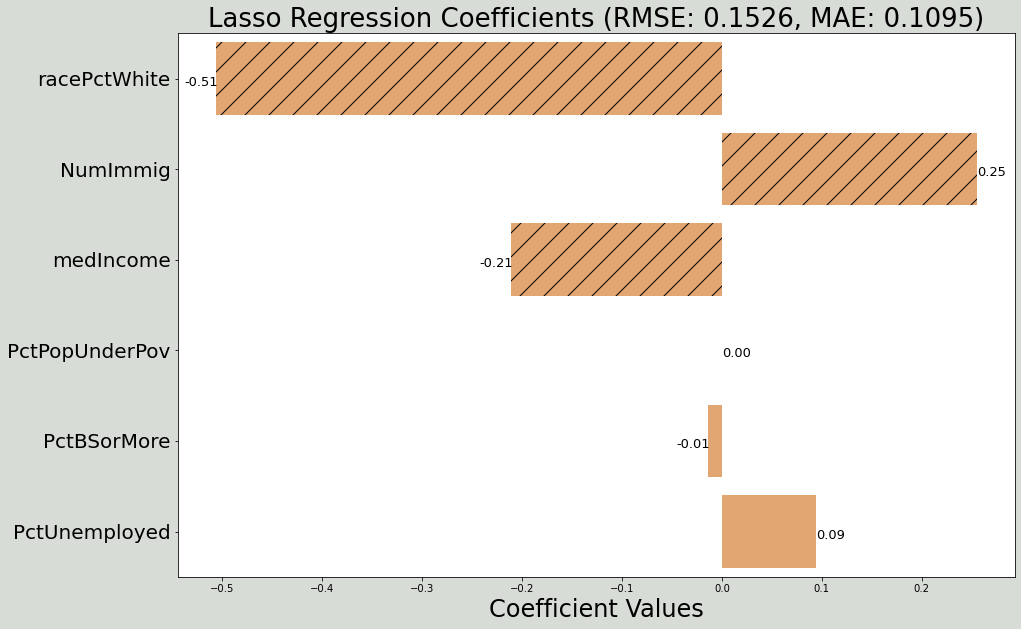

In [252]:
patterns = [ "/" , "/" , "/" , "", "", ""]
fig, ax = plt.subplots(figsize=(15,10), facecolor = ('xkcd:light grey'))
ax = sns.barplot(tuned_lasso.coef_, X.columns[0:], color = "sandybrown",orient='h', hatch=patterns)
# Annotate every single Bar with its value, based on it's width           
for p in ax.patches:
    width = p.get_width()
    if width >= 0:
        plt.text(p.get_width()+0.015, p.get_y()+0.55*p.get_height(),
                 '{:1.2f}'.format(width), fontsize = 13,
                 ha='center', va='center')
    elif width <0.01 and width > -0.01:
        plt.text(p.get_width()+0.015, p.get_y()+0.55*p.get_height(),
             0.00, fontsize = 13,
             ha='center', va='center')
    else:
        plt.text(p.get_width()-0.015, p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width), fontsize = 13,
             ha='center', va='center')
        
ax.set_xlabel('Coefficient Values', fontsize = 24)
#ax.set_ylabel('Coefficient Values', fontsize = 18)
ax.set_title('Lasso Regression Coefficients (RMSE: 0.1526, MAE: 0.1095)', fontsize = 26)
ax.set_yticklabels(X.columns[0:],fontsize = 20)
#ax.set_facecolor('xkcd:off white')
#ax.grid(zorder=0)
fig.savefig("lasso.pdf")

### KNN

In [218]:
df_agg['crime_category'] = pd.cut(df_agg['ViolentCrimesPerPop'], bins = [0, df_agg['ViolentCrimesPerPop'].quantile(0.25), 
                                                                 df_agg['ViolentCrimesPerPop'].quantile(0.5),
                                                                 df_agg['ViolentCrimesPerPop'].quantile(0.75), 1], 
                                labels = ['low', 'med', 'high', 'very high'])

C:\Users\shane\AppData\Local\Temp/ipykernel_22968/3621396024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg['crime_category'] = pd.cut(df_agg['ViolentCrimesPerPop'], bins = [0, df_agg['ViolentCrimesPerPop'].quantile(0.25),


In [108]:
df_agg.head()

,ViolentCrimesPerPop,state,population,racepctblack,racePctWhite,NumImmig,medIncome,PctPopUnderPov,PctBSorMore,PctUnemployed,crime_category
0,0.20,8,0.19,0.02,0.90,0.03,0.37,0.19,0.48,0.27,high
1,0.67,53,0.00,0.12,0.74,0.01,0.31,0.24,0.30,0.27,very high
2,0.43,24,0.00,0.49,0.56,0.00,0.30,0.27,0.19,0.36,very high
3,0.12,34,0.04,1.00,0.08,0.02,0.58,0.10,0.31,0.33,med
4,0.03,42,0.01,0.02,0.95,0.00,0.50,0.06,0.33,0.12,low


In [265]:
df_agg = df_agg.dropna()
X = df_agg.iloc[:,[2,3,4,5,6,7,8,9]] # not inc categorical variables or highly corr variables
y = df_agg.iloc[:,10]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
kclass = neigh.fit(X_train, y_train)
kclass.classes_
#print(neigh.predict([[1.1]]))

from sklearn import metrics
print(metrics.accuracy_score(neigh.predict(X_test),y_test))

In [709]:
# cm = confusion_matrix(y_test, neigh.predict(X_test))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, cmap='Blues', display_labels=neigh.classes_)
# disp.plot()

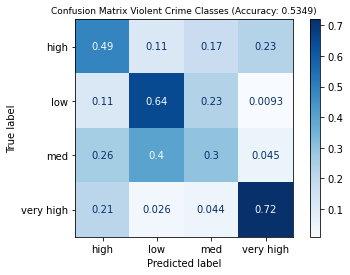

In [224]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, neigh.predict(X_test))
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
#fig, ax = plt.subplots(figsize=(13,8))
disp = plot_confusion_matrix(
    kclass,
    X_test,
    y_test,
    #display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize='true', ##################
)
disp.ax_.set_title("Confusion Matrix Violent Crime Classes (Accuracy: 0.5349)", fontsize=9)
plt.savefig("cm1.pdf")

In [558]:
np.unique(neigh.predict(X_test), return_counts=True)

(array(['high', 'low', 'med', 'very high'], dtype=object),
 array([135, 106,  62,  94], dtype=int64))

In [619]:
# multiverse
df_agg['crime_category1'] = pd.cut(df_agg['ViolentCrimesPerPop'], bins = [0, 0.25, 
                                                                 0.5,
                                                                 0.75, 1], 
                                labels = ['low', 'med', 'high', 'very high'])
X = df_agg.iloc[:,[2,3,4,5,6,7,8,9]] # not inc categorical variables or highly corr variables
y = df_agg.iloc[:,11]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED
neigh = KNeighborsClassifier(n_neighbors=5)
kclass = neigh.fit(X_train, y_train)
from sklearn import metrics
print(metrics.accuracy_score(neigh.predict(X_test),y_test))

0.7279596977329975


In [556]:
np.unique(neigh.predict(X_test), return_counts=True)

(array(['high', 'low', 'med', 'very high'], dtype=object),
 array([ 41, 278,  56,  22], dtype=int64))

In [583]:
df_agg['crime_category2'] = pd.cut(df_agg['ViolentCrimesPerPop'], bins = [0, 
                                                                 0.5,
                                                                 1], 
                                labels = ['low', 'high'])
X = df_agg.iloc[:,[2,3,4,5,6,7,8,9]] # not inc categorical variables or highly corr variables
y = df_agg.iloc[:,12]
TEST_SIZE = 0.2 
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED
neigh = KNeighborsClassifier(n_neighbors=5)
kclass = neigh.fit(X_train, y_train)
from sklearn import metrics
print(metrics.accuracy_score(neigh.predict(X_test),y_test))

0.9017632241813602


In [554]:
np.unique(neigh.predict(X_test), return_counts=True)

(array(['high', 'low'], dtype=object), array([ 45, 352], dtype=int64))